# import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**import dataset**

In [2]:
resume_data = pd.read_csv("/content/UpdatedResumeDataSet.csv", error_bad_lines = False ,engine = "python")

Skipping line 655: unexpected end of data


In [3]:
resume_data.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  653 non-null    object
 1   Resume    653 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


In [5]:
resume_data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
resume_data.shape

(653, 2)

**look and visualize at the categories**


In [7]:
unique_vals = resume_data['Category'].unique()
print(unique_vals)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer']


In [8]:
num_unique_vals = len(unique_vals)
print(num_unique_vals)

17


In [9]:
vals_count = resume_data['Category'].value_counts()
print(vals_count)

Java Developer            84
DevOps Engineer           54
Python Developer          48
Web Designing             45
HR                        44
Operations Manager        40
Data Science              40
Sales                     40
Mechanical Engineer       40
Arts                      36
Health and fitness        30
Electrical Engineering    30
Business Analyst          28
Automation Testing        26
SAP Developer             24
Civil Engineer            24
Advocate                  20
Name: Category, dtype: int64


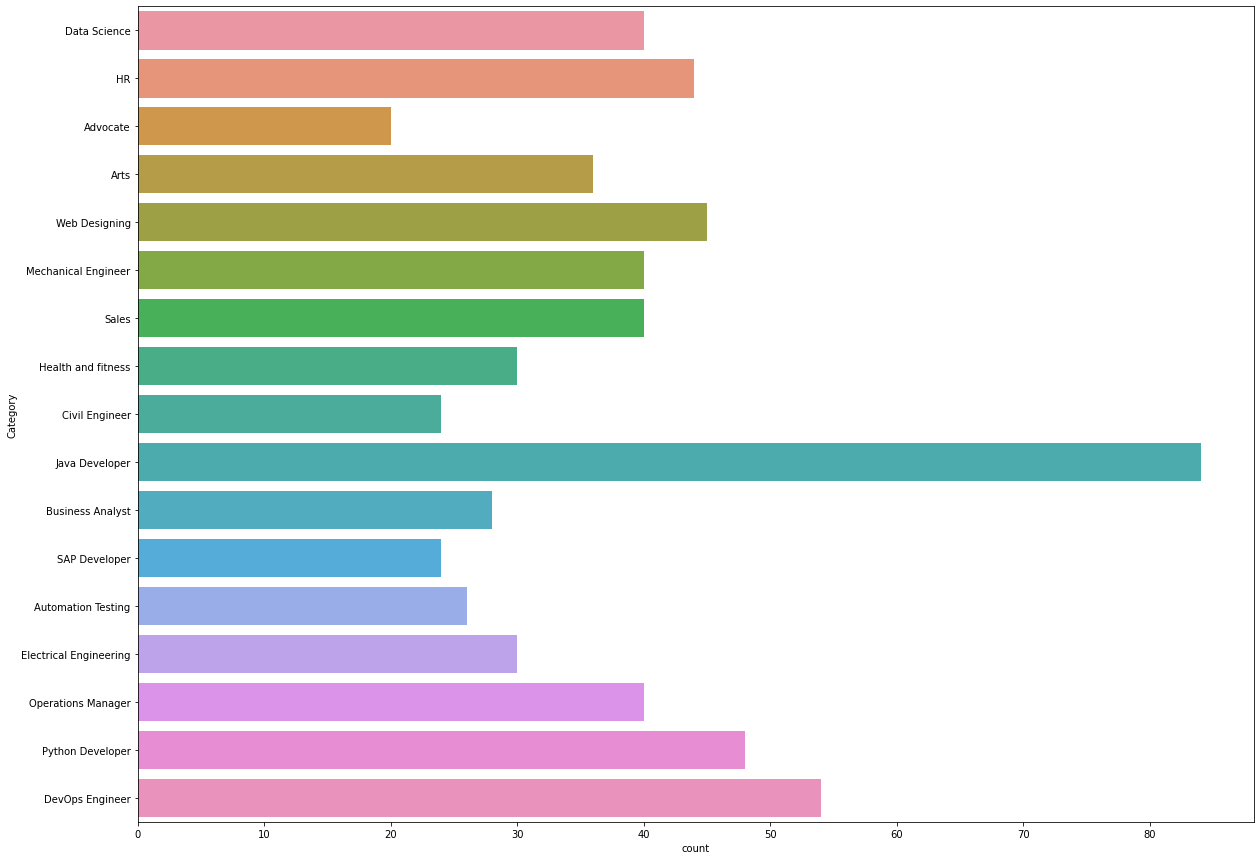

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=resume_data)

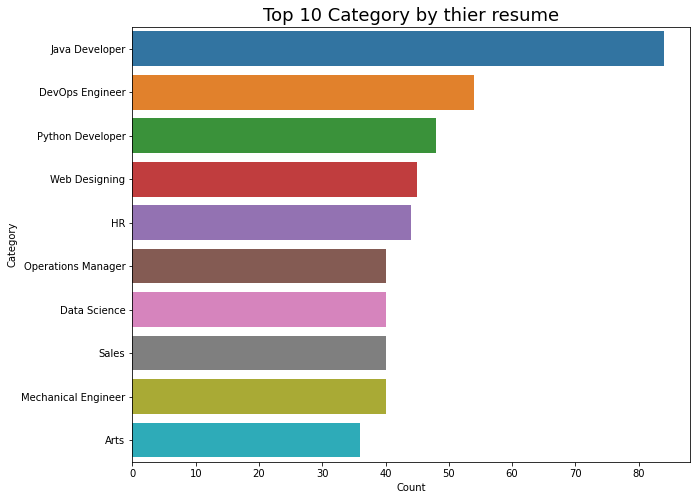

In [11]:
#Top 10 category
Category = resume_data['Category'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(y=Category.index, x=Category.values, data=resume_data)
plt.title("Top 10 Category by thier resume", fontsize=18)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

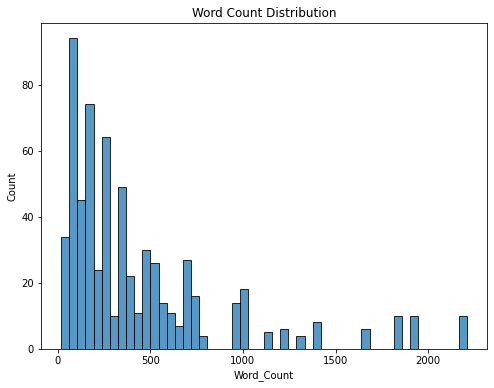

In [12]:
# Visualize the word count distribution
resume_data['Word_Count'] = resume_data['Resume'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
sns.histplot(resume_data, x='Word_Count', bins=50)
plt.title('Word Count Distribution')
plt.show()

**visualize the distribution of category**

In [13]:
# The GridSpec class is used to create a grid of subplots with different sizes and positions.
#  The class takes two arguments, rows and columns
from matplotlib.gridspec import GridSpec

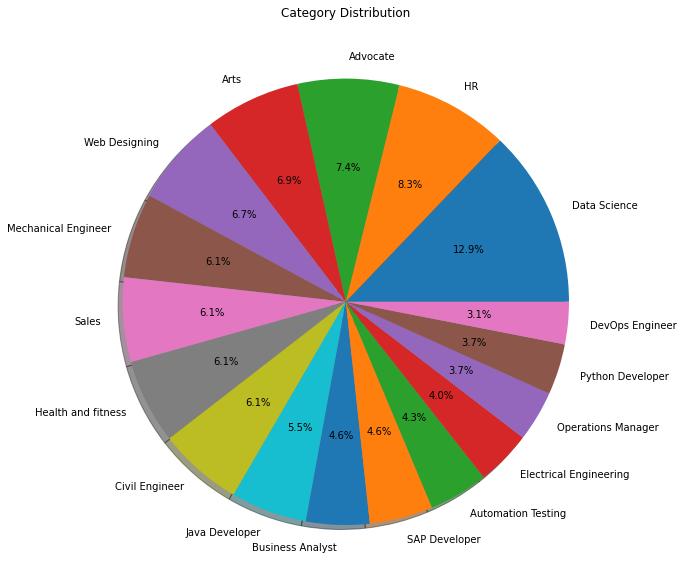

In [14]:

count = resume_data['Category'].value_counts()
label = resume_data['Category'].unique()

plt.figure(figsize=(22,25))
grid = GridSpec(2,2)

cmap = plt.get_cmap("coolwarm")
plt.subplot(grid[0, 1], aspect = 1 , title = 'Category Distribution')

source_pie = plt.pie (count , labels = label , autopct = '%1.1f%%' , shadow = True )

plt.show()



**Remove the urls , hashtag , mension, mentions, and punctations**

In [15]:
# A regular expression (or RE) specifies a set of strings that matches it.
import re

In [16]:
def clean (text):
  text = re.sub("http\s+\s*", ' ', text) # remove URLs
  text = re.sub("RT|cc", ' ', text)      # remove RT and cc
  text = re.sub("#\s+", '', text)       # remove hashtags
  text = re.sub("@\s+", '', text)        # remove mentions
  text = re.sub('[%s]'% re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ' , text)        # remove punctations

  text = re.sub('\s+', ' ', text)  # remove extra whitespace
  text = re.sub(r'[^\x00-\x7f]',r' ', text)

  return text

resume_data['clean text'] = resume_data.Resume.apply(lambda x :clean(x))


  

In [17]:
resume_data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
648    Skills VISA B1 VISA USA Onsite Visits to Swede...
649    Software Proficiency     Languages Basics of C...
650    CORE COMPETENCIES Ant Maven GIT Bitbucket Jenk...
651    Skills VISA B1 VISA USA Onsite Visits to Swede...
652    Software Proficiency     Languages Basics of C...
Name: clean text, Length: 653, dtype: object

In [18]:
resume_data.head(5)

,Category,Resume,Word_Count,clean text
0,Data Science,Skills * Programming Languages: Python (pandas...,670,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,163,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",265,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,993,Skills R Python SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",69,Education Details MCA YMCAUST Faridabad Haryan...


#plot word cloud image

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

totalWords =[]
Sentences = resume_data['Resume'].values
cleanedSentences = ""

for records in Sentences:
    text = clean(records)
    cleanedSentences += text
    requiredWords = nltk.word_tokenize(text)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 2399), ('company', 2205), ('months', 2022), ('Details', 1992), ('description', 1803), ('1', 1514), ('team', 1146), ('project', 1131), ('Project', 1105), ('6', 983), ('Maharashtra', 928), ('year', 872), ('Less', 775), ('Ltd', 715), ('Pune', 714), ('Java', 677), ('Skill', 667), ('January', 661), ('Engineering', 628), ('Management', 627), ('development', 622), ('2', 608), ('C', 570), ('Education', 569), ('Pvt', 556), ('using', 535), ('India', 533), ('Python', 527), ('data', 505), ('application', 495), ('requirements', 493), ('customer', 484), ('monthsCompany', 479), ('University', 478), ('A', 475), ('business', 472), ('various', 470), ('Developer', 470), ('Operations', 469), ('Team', 464), ('Software', 459), ('3', 459), ('4', 458), ('System', 455), ('Technologies', 449), ('work', 442), ('I', 435), ('Responsibilities', 429), ('activities', 423), ('SQL', 420)]


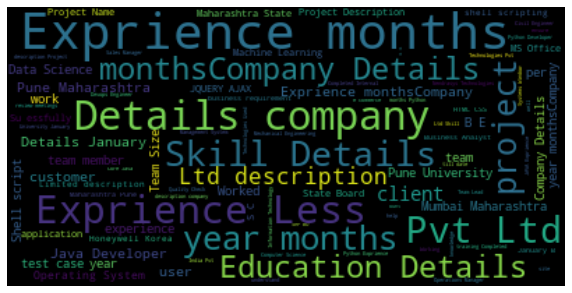

In [21]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Machine learning model

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_data[i] = le.fit_transform(resume_data[i])

In [24]:
resume_data.head(5)

,Category,Resume,Word_Count,clean text
0,5,Skills * Programming Languages: Python (pandas...,670,Skills Programming Languages Python pandas num...
1,5,Education Details \r\nMay 2013 to May 2017 B.E...,163,Education Details May 2013 to May 2017 B E UIT...
2,5,"Areas of Interest Deep Learning, Control Syste...",265,Areas of Interest Deep Learning Control System...
3,5,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,993,Skills R Python SAP HANA Table...
4,5,"Education Details \r\n MCA YMCAUST, Faridab...",69,Education Details MCA YMCAUST Faridabad Haryan...


In [25]:
resume_data.drop(['Word_Count'], axis = 1)

,Category,Resume,clean text
0,5,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,5,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,5,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,5,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,5,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
648,6,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,Skills VISA B1 VISA USA Onsite Visits to Swede...
649,6,Software Proficiency: â¢ Languages: Basics of...,Software Proficiency Languages Basics of C...
650,6,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...,CORE COMPETENCIES Ant Maven GIT Bitbucket Jenk...
651,6,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,Skills VISA B1 VISA USA Onsite Visits to Swede...


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [29]:
text = resume_data['clean text'].values
target = resume_data['Category'].values

vect = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features = 2000)

vect.fit(text)

word_feature = vect.transform(text)

In [30]:
word_feature

<653x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 84001 stored elements in Compressed Sparse Row format>

In [31]:
X_train,X_test,y_train,y_test = train_test_split(word_feature , target, random_state=0, test_size=0.2)


In [32]:
print(X_train.shape)
print(X_test.shape)

(522, 2000)
(131, 2000)


In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model1 = OneVsRestClassifier(KNeighborsClassifier())
model1.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [37]:
prediction = model1.predict(X_test)

In [38]:
print("traning score: {:.2f}".format(model1.score(X_train,y_train)))
print("test score: {:.2f}".format(model1.score(X_test,y_test)))

traning score: 0.99
test score: 0.99


In [39]:
from sklearn import metrics
print("model1 report: %s: \n %s\n" %(model1 , metrics.classification_report(y_test, prediction)))

model1 report: OneVsRestClassifier(estimator=KNeighborsClassifier()): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         8
         